In [2]:
# import librosa
import sys
sys.path.append('/Users/angelinazhai/ffmpeg') #https://stackoverflow.com/questions/57350259/filenotfounderror-errno-2-no-such-file-or-directory-ffprobe-ffprobe

# import scipy
from scipy import signal
import matplotlib.pyplot as plt
import os
import numpy as np

#import pydub for reading audio files
# import pydub
# from pydub import AudioSegment
# from ffprobe import FFProbe #needed for pydub 

import librosa
import librosa.display



In [4]:
#relocate to folder with recordings
os.chdir('/Users/angelinazhai/Desktop/Github-Repositories/language-dsp/recordings/original')

In [11]:
# import audioread.ffdec
# sampling_rate = 44100
y, sr = librosa.load('Ree Eng.m4a')
# S = np.abs(librosa.stft(y)) #stft transform
print(y, sr)

D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9317336e-05
 -3.1596432e-05  0.0000000e+00] 22050


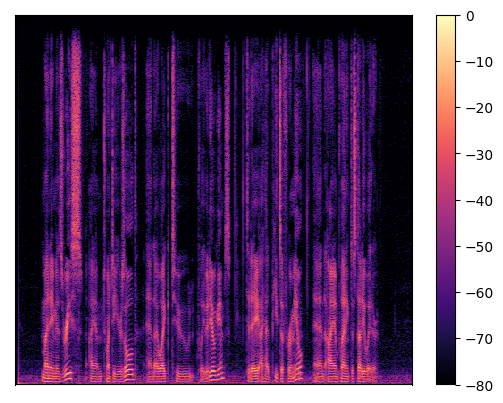

In [12]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()
plt.show()